# Question 1: Image Reading and Matrix Fundamentals

This notebook demonstrates basic image processing operations using OpenCV and NumPy.

## Overview
- Task 1: Reading Images (Basics)
- Task 2: Image as a Matrix
- Task 3: Manual Pixel Manipulation
- Task 4: Creating Matrices Manually
- Task 5: Matrix Operations on Images


In [106]:
# Import required libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple, Union

# Set image path (update this with your image path)
image_path = '/home/yonatan.r/Downloads/istockphoto-520700958-612x612.jpg'  # Replace with your image path


## Task 1: Reading Images (Basics)


In [107]:
def print_image_info(image: np.ndarray) -> None:
    """Print basic information about an image."""
    print("Image Information:")
    print(f"  Shape (height, width, channels): {image.shape}")
    print(f"  Data type: {image.dtype}")
    num_channels = image.shape[2] if len(image.shape) == 3 else 1
    print(f"  Number of channels: {num_channels}")


def display_image_pair(original_rgb: np.ndarray, grayscale: np.ndarray) -> None:
    """Display original and grayscale images side by side."""
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.imshow(original_rgb)
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(grayscale, cmap='gray')
    plt.title('Grayscale Image')
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()


def read_and_display_image(image_path: str) -> Tuple[np.ndarray, np.ndarray]:
    """
    Read an image and display basic information about it.
    
    Args:
        image_path: Path to the image file
    
    Returns:
        Tuple containing (original_image, grayscale_image)
    """
    original_image = cv2.imread(image_path)
    
    if original_image is None:
        raise ValueError(f"Could not read image from {image_path}")
    
    original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
    grayscale_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
    
    print_image_info(original_image)
    display_image_pair(original_image_rgb, grayscale_image)
    
    return original_image, grayscale_image


QUESTION 1: Image Reading and Matrix Fundamentals

[TASK 1] Reading Images (Basics)
------------------------------------------------------------
Image Information:
  Shape (height, width, channels): (408, 612, 3)
  Data type: uint8
  Number of channels: 3


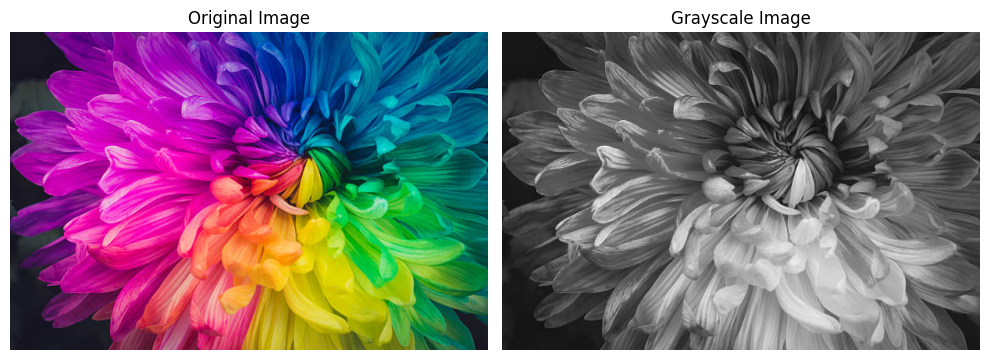

In [108]:
# Execute Task 1
print("="*60)
print("QUESTION 1: Image Reading and Matrix Fundamentals")
print("="*60)

print("\n[TASK 1] Reading Images (Basics)")
print("-" * 60)
original_image, grayscale_image = read_and_display_image(image_path)


## Task 2: Image as a Matrix


In [109]:
def display_rgb_matrix_section(matrix_section: np.ndarray, size: int, 
                                start_row: int, start_col: int) -> None:
    """Display RGB image matrix section with all channels."""
    print(f"\nRGB Image Matrix Section ({size}x{size}) starting at ({start_row}, {start_col}):")
    print("Shape:", matrix_section.shape)
    print("Red channel:")
    print(matrix_section[:, :, 0])
    print("Green channel:")
    print(matrix_section[:, :, 1])
    print("Blue channel:")
    print(matrix_section[:, :, 2])


def display_grayscale_matrix_section(matrix_section: np.ndarray, size: int,
                                     start_row: int, start_col: int) -> None:
    """Display grayscale image matrix section."""
    print(f"\nGrayscale Image Matrix Section ({size}x{size}) starting at ({start_row}, {start_col}):")
    print(matrix_section)


def display_image_matrix_section(image: np.ndarray, size: int = 5, 
                                  start_row: int = 0, start_col: int = 0) -> np.ndarray:
    """
    Display a small section of the image matrix.
    
    Args:
        image: Image array (can be RGB or grayscale)
        size: Size of the block to display (default: 5x5)
        start_row: Starting row index
        start_col: Starting column index
    
    Returns:
        The extracted matrix section
    """
    end_row = start_row + size
    end_col = start_col + size
    
    if len(image.shape) == 3:
        matrix_section = image[start_row:end_row, start_col:end_col, :]
        display_rgb_matrix_section(matrix_section, size, start_row, start_col)
    else:
        matrix_section = image[start_row:end_row, start_col:end_col]
        display_grayscale_matrix_section(matrix_section, size, start_row, start_col)
    
    return matrix_section


def explain_matrix_types() -> None:
    """Print explanations about different image matrix types."""
    print("\n" + "="*60)
    print("EXPLANATION: Image Matrix Types")
    print("="*60)
    
    print("\n1. RGB Image Matrix:")
    print("   - 3D array: (height, width, 3)")
    print("   - Each pixel has 3 values: [Red, Green, Blue]")
    print("   - Values range from 0 to 255")
    print("   - Example: [255, 0, 0] = pure red")
    
    print("\n2. Grayscale Matrix:")
    print("   - 2D array: (height, width)")
    print("   - Each pixel has 1 value representing intensity")
    print("   - Values range from 0 (black) to 255 (white)")
    print("   - Example: 128 = medium gray")
    
    print("\n3. Binary (Thresholded) Matrix:")
    print("   - 2D array: (height, width)")
    print("   - Each pixel has 1 value: 0 (black) or 255 (white)")
    print("   - Created by thresholding grayscale image")
    print("   - Example: 0 = black, 255 = white")
    print("="*60 + "\n")


In [110]:
# Execute Task 2
print("\n[TASK 2] Image as a Matrix")
print("-" * 60)
display_image_matrix_section(original_image, size=7, start_row=10, start_col=50)
display_image_matrix_section(grayscale_image, size=7, start_row=10, start_col=50)
explain_matrix_types()



[TASK 2] Image as a Matrix
------------------------------------------------------------

RGB Image Matrix Section (7x7) starting at (10, 50):
Shape: (7, 7, 3)
Red channel:
[[ 58  89 118 136 141 136 135]
 [ 39  65  95 121 136 142 133]
 [ 32  46  66  95 123 140 132]
 [ 32  34  42  65  98 121 135]
 [ 32  27  28  42  68  88 132]
 [ 33  24  22  32  48  63 125]
 [ 34  34  34  34  34  34  63]]
Green channel:
[[18 23 29 29 21 12 23]
 [18 22 28 29 24 18 19]
 [23 23 22 25 29 31 22]
 [26 24 18 20 29 39 29]
 [27 24 18 19 28 36 32]
 [24 23 20 20 25 30 29]
 [21 21 21 21 21 21 17]]
Blue channel:
[[ 29  48  73  92 102 104 101]
 [ 16  25  49  78 101 110  96]
 [ 14  15  28  56  88 109  94]
 [ 19  14  18  37  66  88  98]
 [ 26  20  18  24  40  54  98]
 [ 27  25  20  20  23  27  93]
 [ 23  23  23  23  23  23  39]]

Grayscale Image Matrix Section (7x7) starting at (10, 50):
[[26 38 52 60 59 54 59]
 [20 28 42 54 60 60 55]
 [21 23 29 42 57 67 56]
 [25 22 21 30 48 63 62]
 [27 23 19 23 36 47 63]
 [26 24 20 21

## Task 3: Manual Pixel Manipulation


In [111]:
def create_rectangle(image: np.ndarray, top_left: Tuple[int, int],
                    bottom_right: Tuple[int, int],
                    color: Union[int, Tuple[int, int, int]]) -> np.ndarray:
    """
    Create a filled rectangle in the image.

    Args:
        image: Image to modify (will be modified in place)
        top_left: (row, col) coordinates of top-left corner
        bottom_right: (row, col) coordinates of bottom-right corner
        color: Color value(s). For RGB: tuple [R, G, B]. For grayscale: int.

    Returns:
        Modified image
    """
    y1, x1 = top_left
    y2, x2 = bottom_right

    if len(image.shape) == 3:
        # RGB image
        if isinstance(color, (int, float)):
            image[y1:y2, x1:x2, :] = [int(color), int(color), int(color)]
        else:
            image[y1:y2, x1:x2, :] = color
    else:
        # Grayscale image
        if isinstance(color, (tuple, list)):
            color_value = int(sum(color) / len(color)) if len(color) > 0 else 0
        else:
            color_value = int(color)
        image[y1:y2, x1:x2] = color_value

    return image


def create_circle(image: np.ndarray, center: Tuple[int, int], radius: int,
                  color: Union[int, Tuple[int, int, int]]) -> np.ndarray:
    """
    Create a filled circle in the image.

    Args:
        image: Image to modify (will be modified in place)
        center: (row, col) coordinates of circle center
        radius: Radius of the circle
        color: Color value(s). For RGB: tuple [R, G, B]. For grayscale: int.

    Returns:
        Modified image
    """
    cy, cx = center
    height, width = image.shape[:2]

    # Create coordinate grids
    y, x = np.ogrid[:height, :width]

    # Calculate distance from center
    mask = (x - cx)**2 + (y - cy)**2 <= radius**2

    if len(image.shape) == 3:
        # RGB image
        if isinstance(color, (int, float)):
            image[mask] = [int(color), int(color), int(color)]
        else:
            image[mask] = color
    else:
        # Grayscale image
        if isinstance(color, (tuple, list)):
            color_value = int(sum(color) / len(color)) if len(color) > 0 else 0
        else:
            color_value = int(color)
        image[mask] = color_value

    return image


def display_comparison(original: np.ndarray, modified: np.ndarray,
                       title: str = "Image Comparison") -> None:
    """
    Display original and modified images side by side.

    Args:
        original: Original image
        modified: Modified image
        title: Title for the figure
    """
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    if len(original.shape) == 3:
        plt.imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(original, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    if len(modified.shape) == 3:
        plt.imshow(cv2.cvtColor(modified, cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(modified, cmap='gray')
    plt.title('Modified Image')
    plt.axis('off')

    plt.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()


def manipulate_pixels_manually(image: np.ndarray,
                               operations: list) -> np.ndarray:
    """
    Manually manipulate pixels in an image based on a list of operations.

    Args:
        image: Input image (will be copied to avoid modifying original)
        operations: List of operations. Each operation is a dict with:
                   - 'type': 'rectangle' or 'circle'
                   - 'params': dict with operation-specific parameters
                   - 'color': color value(s)

    Returns:
        Modified image
    """
    modified_image = image.copy()

    for op in operations:
        op_type = op.get('type')
        params = op.get('params', {})
        color = op.get('color', (255, 255, 255))

        if op_type == 'rectangle':
            top_left = params.get('top_left')
            bottom_right = params.get('bottom_right')
            if top_left and bottom_right:
                create_rectangle(modified_image, top_left, bottom_right, color)

        elif op_type == 'circle':
            center = params.get('center')
            radius = params.get('radius')
            if center and radius:
                create_circle(modified_image, center, radius, color)

    return modified_image


Example 1: Red rectangle on BGR image


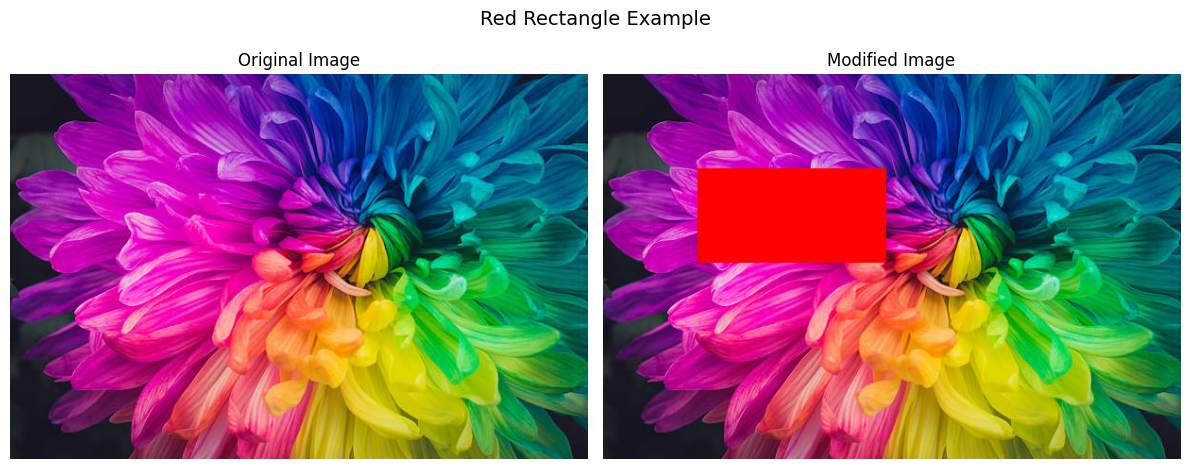

In [112]:
# Example 1: Create a red rectangle on BGR image
# Note: original_image is in BGR format, so red is (0, 0, 255) in BGR
print("Example 1: Red rectangle on BGR image")
modified_rgb = manipulate_pixels_manually(original_image, [
    {
        'type': 'rectangle',
        'params': {
            'top_left': (100, 100),
            'bottom_right': (200, 300)
        },
        'color': (0, 0, 255)  # Red in BGR format
    }
])
display_comparison(original_image, modified_rgb, "Red Rectangle Example")


Example 2: Blue circle on BGR image


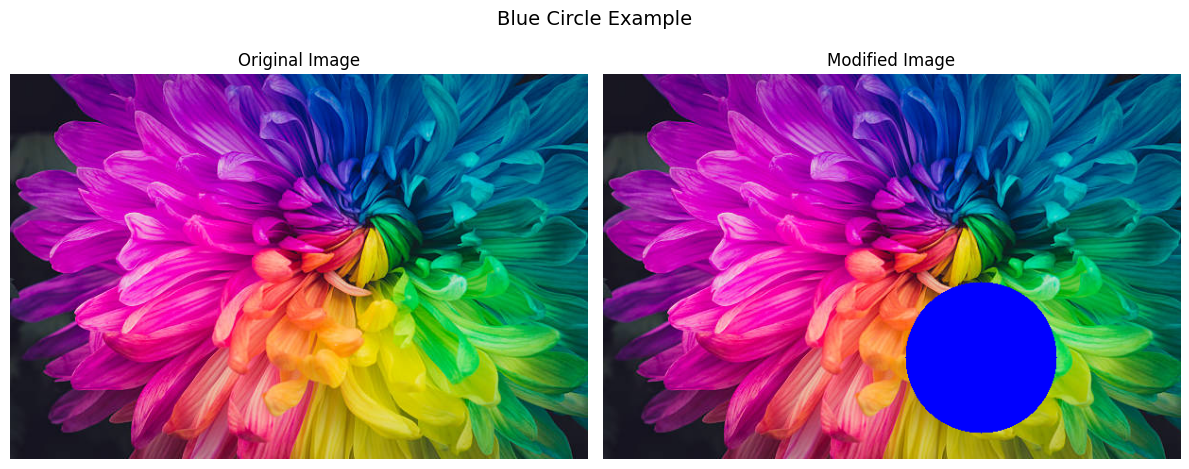

In [113]:
# Example 2: Create a blue circle on BGR image
# Note: original_image is in BGR format, so blue is (255, 0, 0) in BGR
print("\nExample 2: Blue circle on BGR image")
modified_rgb2 = manipulate_pixels_manually(original_image, [
    {
        'type': 'circle',
        'params': {
            'center': (300, 400),
            'radius': 80
        },
        'color': (255, 0, 0)  # Blue in BGR format
    }
])
display_comparison(original_image, modified_rgb2, "Blue Circle Example")


Example 3: Multiple shapes on grayscale image


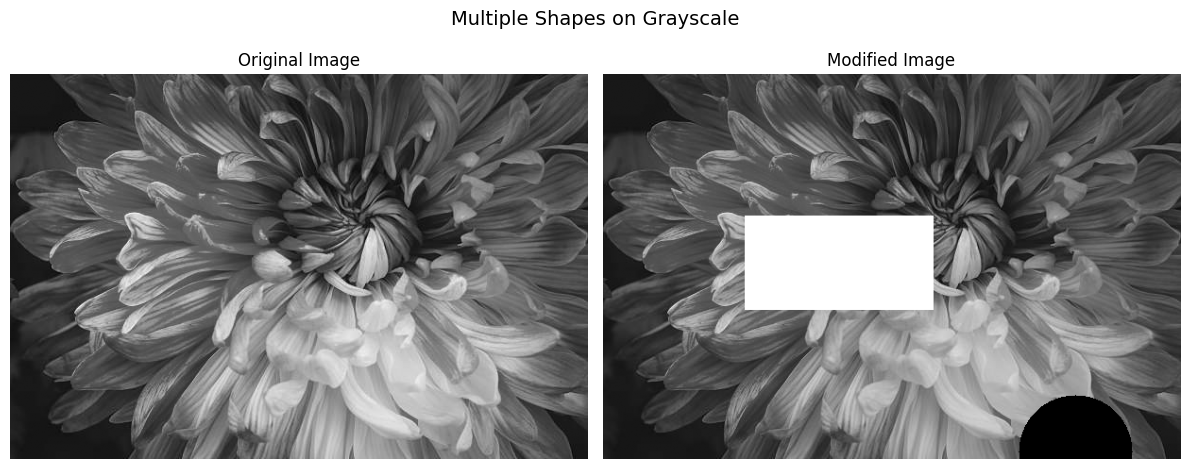

In [114]:
# Example 3: Multiple shapes on grayscale image
print("\nExample 3: Multiple shapes on grayscale image")
modified_gray = manipulate_pixels_manually(grayscale_image, [
    {
        'type': 'rectangle',
        'params': {
            'top_left': (150, 150),
            'bottom_right': (250, 350)
        },
        'color': 255  # White
    },
    {
        'type': 'circle',
        'params': {
            'center': (400, 500),
            'radius': 60
        },
        'color': 0  # Black
    }
])
display_comparison(grayscale_image, modified_gray, "Multiple Shapes on Grayscale")

In [115]:
explanation = """
Explanation:
Manual pixel manipulation demonstrates that images are just arrays of numbers.
By directly setting pixel values, we can create shapes and patterns.
This is the foundation of image processing - understanding that every pixel
is a number (or set of numbers for RGB) that we can modify programmatically.
"""
print(explanation)


Explanation:
Manual pixel manipulation demonstrates that images are just arrays of numbers.
By directly setting pixel values, we can create shapes and patterns.
This is the foundation of image processing - understanding that every pixel
is a number (or set of numbers for RGB) that we can modify programmatically.



## Task 4: Creating Matrices Manually


In [116]:
def create_diagonal_matrix(size: int = 10) -> np.ndarray:
    """
    Create a 10x10 matrix with a diagonal line pattern.
    
    Args:
        size: Size of the matrix (default: 10)
    
    Returns:
        Matrix with diagonal line (255 on diagonal, 0 elsewhere)
    """
    matrix = np.zeros((size, size), dtype=np.uint8)
    np.fill_diagonal(matrix, 255)
    return matrix


def create_filled_square_matrix(size: int = 10, square_size: int = 5) -> np.ndarray:
    """
    Create a 10x10 matrix with a filled square pattern.
    
    Args:
        size: Size of the matrix (default: 10)
        square_size: Size of the filled square (default: 5)
    
    Returns:
        Matrix with a filled square (255 in square, 0 elsewhere)
    """
    matrix = np.zeros((size, size), dtype=np.uint8)
    start = (size - square_size) // 2
    end = start + square_size
    matrix[start:end, start:end] = 255
    return matrix


def create_gradient_matrix(size: int = 10) -> np.ndarray:
    """
    Create a 10x10 matrix with a gradient from 0 to 255.
    
    Args:
        size: Size of the matrix (default: 10)
    
    Returns:
        Matrix with gradient values from 0 to 255
    """
    # Create gradient along columns (left to right: 0 to 255)
    gradient = np.linspace(0, 255, size, dtype=np.uint8)
    matrix = np.tile(gradient, (size, 1))
    return matrix

def display_all_matrices(diagonal: np.ndarray, square: np.ndarray, 
                         gradient: np.ndarray) -> None:
    """
    Display all three matrices side by side.
    
    Args:
        diagonal: Diagonal line matrix
        square: Filled square matrix
        gradient: Gradient matrix
    """
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    axes[0].imshow(diagonal, cmap='gray', vmin=0, vmax=255)
    axes[0].set_title('Diagonal Line', fontsize=12)
    axes[0].axis('off')
    
    axes[1].imshow(square, cmap='gray', vmin=0, vmax=255)
    axes[1].set_title('Filled Square', fontsize=12)
    axes[1].axis('off')
    
    axes[2].imshow(gradient, cmap='gray', vmin=0, vmax=255)
    axes[2].set_title('Gradient (0 to 255)', fontsize=12)
    axes[2].axis('off')
    
    plt.suptitle('Task 4: Manually Created Matrices (10×10)', fontsize=14)
    plt.tight_layout()
    plt.show()


In [117]:
# Create the three matrices
print("\nCreating 10×10 matrices with different patterns...")
diagonal_matrix = create_diagonal_matrix(size=10)
filled_square_matrix = create_filled_square_matrix(size=10, square_size=5)
gradient_matrix = create_gradient_matrix(size=10)


Creating 10×10 matrices with different patterns...


In [118]:
# Display individual matrices
print("\n1. Diagonal Line Matrix:")
print("Matrix values:")
print(diagonal_matrix)


1. Diagonal Line Matrix:
Matrix values:
[[255   0   0   0   0   0   0   0   0   0]
 [  0 255   0   0   0   0   0   0   0   0]
 [  0   0 255   0   0   0   0   0   0   0]
 [  0   0   0 255   0   0   0   0   0   0]
 [  0   0   0   0 255   0   0   0   0   0]
 [  0   0   0   0   0 255   0   0   0   0]
 [  0   0   0   0   0   0 255   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0]
 [  0   0   0   0   0   0   0   0 255   0]
 [  0   0   0   0   0   0   0   0   0 255]]


In [119]:
print("\n2. Filled Square Matrix:")
print("Matrix values:")
print(filled_square_matrix)


2. Filled Square Matrix:
Matrix values:
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0 255 255 255 255 255   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


In [120]:
print("\n3. Gradient Matrix (0 to 255):")
print("Matrix values:")
print(gradient_matrix)


3. Gradient Matrix (0 to 255):
Matrix values:
[[  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]
 [  0  28  56  85 113 141 170 198 226 255]]



All matrices displayed together:


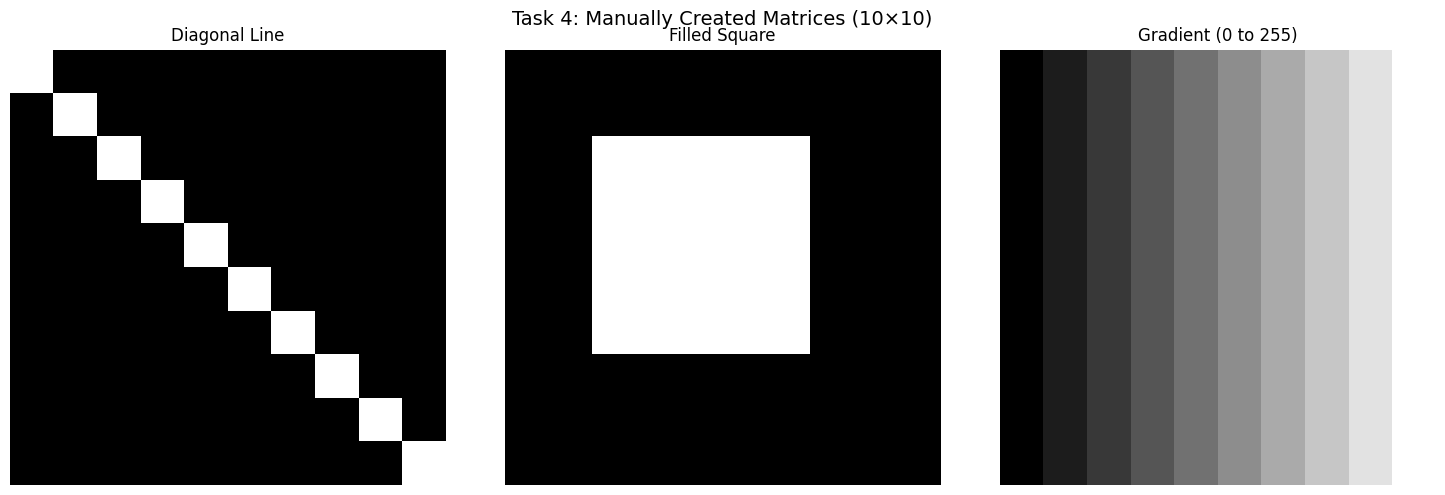

In [121]:
# Display all matrices together
print("\nAll matrices displayed together:")
display_all_matrices(diagonal_matrix, filled_square_matrix, gradient_matrix)

In [122]:
explanation = """
Explanation:
These matrices demonstrate that we can create images programmatically
by directly setting pixel values. Each matrix is a NumPy array where
each element represents a pixel intensity value (0-255 for grayscale).
By manipulating these arrays, we can create any pattern or shape we want.
"""
print(explanation)



Explanation:
These matrices demonstrate that we can create images programmatically
by directly setting pixel values. Each matrix is a NumPy array where
each element represents a pixel intensity value (0-255 for grayscale).
By manipulating these arrays, we can create any pattern or shape we want.

